## Problem 1

Prove that the worst-case expected running time of every randomized comparison-based sorting algorithm is $\Omega(n \log n)$. (Here the worst-case is over inputs, and the expectation is over the random coin flips made by the algorithm.)

#### $\textit{Proof:}$

For input array $[1, 2, ..., n]$ there are $n!$ different permutations. If our algorithm is doing $k$ comparisons, it can rearrange the input array in maximum $2^k$ ways. Therefore $2^k \geq n! \Rightarrow k \geq log_2(n!) \geq log_2({\frac{n}{2}}^{\frac{n}{2}})=\frac{n}{2} \frac{\log n - \log 2}{\log 2}$ 
$ \geq c n \log n $, where $c = \frac{1}{2 \log 2} \Rightarrow k = \Omega(n \log n)$

## Problem 2

Suppose we modify the deterministic linear-time selection algorithm by grouping the elements into groups of 7, rather than groups of 5. (Use the "median-of-medians" as the pivot, as before.) Does the algorithm still run in $O(n)$ time? What if we use groups of 3?

#### $\textit{Answer: works for 7, doesn't work for 3}$

#### $\textit{Proof for 7: }$

Repeating the proof from the lecture we will get next reccurence for $7$:
$$T(n)\leq cn + T(\frac{1}{7}n)+T(\frac{5}{7}n)$$
Suppoce we have proved for all $n \leq N$ that $T(n)=O(n)$. 
Let's choose $a=7c$, then $$T(n)\leq a\frac{1}{7}n + a\frac{1}{7}n+a\frac{5}{7}n=an$$

#### $\textit{Proof for 3: }$

However for $3$ this won't work:
$$T(n) = O(n) + T(\frac{1}{3}n)+T(\frac{2}{3}n)$$
Then if $\forall n < N T(n) \geq b n \log(n)$, then:
$$T(n) \geq a n \log(n) \Rightarrow T(n)=\Omega (n \log(n))$$

## Problem 3

Given an array of n distinct (but unsorted) elements $x_1,x_2,\ldots,x_n $ with positive weights $w_1,w_2,\ldots,w_n$ such that $\sum_{i=1}^n w_i = W$, a weighted median is an element $x_k$ for which the total weight of all elements with value less than $x_k$ (i.e., $\sum_{x_i \lt x_k} w_i$ is at most $W/2$, and also the total weight of elements with value larger than $x_k$ (i.e., $\sum_{x_i \gt x_k} w_i$ is at most $W/2$. Observe that there are at most two weighted medians. Show how to compute all weighted medians in $O(n)$ worst-case time.

#### $\textit{Proof I}$

First, we was said that weight $w_i$ are positive, i.e. $w_i > 0$. Let's suppose that $x_{i_1} < x_{i_2} < ... < x_{i_n}$ then $0 < w_{i_1} < w_{i_1} + w_{i_2} < ... < \sum_{k=1}^n w_{i_k}=W$. Therefore there is i_med, such that $\sum_{k<med} w_{i_k} < W/2, \sum_{k < med + 1} w_{i_k} \geq W/2, \sum_{k < med + 2} w_{i_k} >W/2$. Let's consider two main cases:

(1) $\sum_{k < med + 1} w_{i_k} = W/2$. Then $\sum_{k < med} w_{i_k} < W/2$ and $\sum_{k > med+1} w_{i_k} = W/2$. Therefore $i_{med+1}$ is median. If we will take $j>med+1$ than $\sum_{k < j} w_{i_k} > W/2$. If we will take $j<med+1$ than $\sum_{k > j} w_{i_k} > W/2$. Hence, in this case $x_{i_{med + 1}}$ is the only w-median.

(1) $\sum_{k < med + 1} w_{i_k} > W/2$. Then $x_{i_{med}}$ and $x_{i_{med+1}}$ will be w-medians.

#### $\textit{Proof II}$

found algorithm $\href{https://cs.stackexchange.com/questions/56299/find-a-weighted-median-for-unsorted-array-in-linear-time}{\text{in this stackexchange answer}}$:

```
def WMedian(A: list[int], W: list[float]):
  if len(A) <= 2:
      return A[0]
  dmedian = DMedian(A) # O(n)
  w_left = sum(W[:dmedian]) # O(n)
  w_right = sum(W[dmedian + 1:]) # O(n)
  if w_left <= W / 2 and w_right <= W / 2:
      return A[dmedian]
  elif w_left > W / 2:
      W[0] += w_left
      return WMedian(A[:dmedian + 1], W[:dmedian + 1]) # O(n)
  elif w_right > W / 2:
      W[0] += w_right
      return Wmedian(A[dmedian:], W[dmedian:]) #O(n)
  # O(1) for all other staf
```

So if T(n)=time complexity(WMedian(n-array, n-array)), then $T(n) \leq 4O(n) + O(1) = O(n)$.

The idea to add weight to the end of array is awesome!

## Problem 4

We showed in an optional video lecture that every undirected graph has only polynomially (in the number nn of vertices) different minimum cuts. Is this also true for directed graphs? Prove it or give a counterexample.

#### $\textit{Proof}$

We can just say that minimum cut of undirected graph determine the minimum cut of directed graph and overwise.

Example (not counter): Let's consider directed cycle as below. We can see that deleting two not connected edges will create the cut of the graph. So if number of edges is $n$, then we will have $ {n \choose 2} - n=O(n^2)$ minimum cuts. 

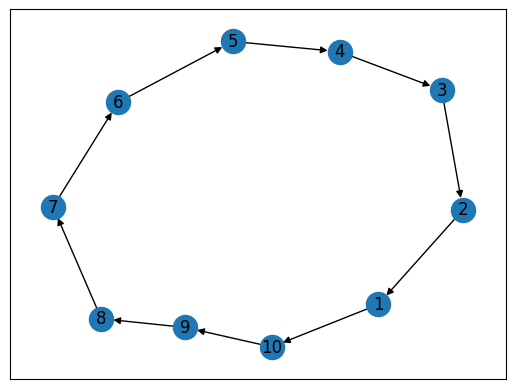

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()
nodes = list(range(1, 11))
edges = list(zip(nodes, nodes[-1:] + nodes[:-1]))
G.add_edges_from(edges)
nx.draw_networkx(G)
plt.show()

## Problem 5

For a parameter $\alpha \ge 1$, an $\alpha\text{-minimum}$ cut is one for which the number of crossing edges is at most $\alpha$ times that of a minimum cut. How many $\alpha\text{-minimum}$ cuts can an undirected graph have, as a function of $\alpha$ and the number n of vertices? Prove the best upper bound that you can.

#### $\textit{Proof}$

Using the same upper-bound for $m \geq \frac{kn}{2}$ and the same equation $P(S_1^C \cap ... \cap S_{n-2}^C)=P(S_{n-2}^C|S_1^C \cap ... \cap S_{n-3}^C)\cdot... P(S_2^C|S_1^C)\cdot P(S_1^C)$ we will get next product:

$\prod_{i=0}^{n-3}(1-\frac{2\alpha}{n-i})$

I am not sure how to simplify this for general $\alpha$